# Pandas and seaborn tutorial

In this tutorial we will discuss two very useful python libraries for data analysis:
- pandas: a library for data manipulation and analysis that uses the concept of dataframes
- seaborn: a visualization library based on matplotlib

Install and import the following packages:

In [2]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA as sklearnPCA

# Pandas

Pandas is a "high-level" module which depends heavily on the "low-level" numpy package. Pandas is more friendly for statistics/exploratory analysis.

### The dataset

To illustrate pandas functionalities, we will use a file that contains gene expression data. 

The study from which the data came investigated the stress response in the hearts mice deficient in the SRC-2 gene (transcriptional regulator steroid receptor coactivator-2). The data can be found here: http://www.ncbi.nlm.nih.gov/pubmed/23300926.

The data are structured as follows:

* each row contains the expression values of a particular gene
* each column corresponds to one sample/condition and contains the expression of values of all genes in that sample

Take a look at the file first in a text editor or on the command line to verify its structure.

The sample names are given in the first row (header). 

Based on the names, we can guess that we have gene expression values for heart tissue of two types: "WT" (wildtype) and "KO" (knock out), and four replicates for each condition:

Heart_WT_1 Heart_WT_2 Heart_WT_3 Heart_WT_4 Heart_KO_1 Heart_KO_2 Heart_KO_3 Heart_KO_4

### Reading data from a file into a dataframe

We first use the function [read_csv](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) to read the file. By default, as the name suggests, this function looks for csv files. **Note**: In case of big datasets it is convenient to look at a fraction of the data. For this the functions [head](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) or [tail](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) are helpful. 

In [3]:
df = pd.read_csv("./Datasets/GDS5087_expr.tsv")

In [4]:
df = pd.read_csv("./Datasets/GDS5087_expr.tsv")
#print(type(df))
df.head()

,Heart_WT_1 Heart_WT_2 Heart_WT_3 Heart_WT_4 Heart_KO_1 Heart_KO_2 Heart_KO_3 Heart_KO_4
0,0610005C13Rik\t15.679\t3.8128\t5.35589\t29.051...
1,0610006L08Rik\t10.1646\t9.28523\t9.82832\t4.74...
2,0610007P14Rik\t479.938\t499.818\t455.665\t412....
3,0610009B22Rik\t2740.47\t3117.59\t3087.69\t2775...
4,0610009L18Rik\t749.211\t511.069\t626.898\t707....


Take a look at how the data have been read: since read_csv() did not find any comma in the file, it treated each entire line as one entry. To correctly read this file, we have to specify that the column separator is a tab:

In [5]:
df = pd.read_csv("./Datasets/GDS5087_expr.tsv", sep='\t')
df.head()

,Heart_WT_1,Heart_WT_2,Heart_WT_3,Heart_WT_4,Heart_KO_1,Heart_KO_2,Heart_KO_3,Heart_KO_4
0610005C13Rik,15.6790,3.81280,5.35589,29.05140,6.2886,5.44082,17.1280,9.28925
0610006L08Rik,10.1646,9.28523,9.82832,4.74096,54.3743,6.71068,18.5957,5.08162
0610007P14Rik,479.9380,499.81800,455.66500,412.38800,384.7330,406.34700,530.6380,394.66700
0610009B22Rik,2740.4700,3117.59000,3087.69000,2775.45000,2879.5700,3246.40000,3153.2300,3336.21000
0610009L18Rik,749.2110,511.06900,626.89800,707.15900,553.6930,731.86300,738.4990,479.11900


In [6]:
print(type(df.Heart_WT_1))

<class 'pandas.core.series.Series'>


In [7]:
print(type(df["Heart_WT_1"]))

<class 'pandas.core.series.Series'>


Let's check the dimensions of the dataframe:

In [8]:
df.shape

(26572, 8)

Now it is obvious that we read the dataframe properly. 

Note that pandas made an additional interpretation. Namely, that gene names should be treated as a column that is not labeled with the column labels found in the file. The gene names are in fact the 'index' (row labels) of the dataframe. The reason the gene names were used as index is because the first line in the GDS5087_expr.tsv file contained 8 entries and all the other lines contain 9 entries. So pandas automatically inferred that the first column should be the index.

To better understand how pandas reads in data let's use the same file, after stripping the header line. 

In [9]:
df = pd.read_csv("Datasets/GDS5087_expr_no_header.tsv", sep='\t')
df.head()


,0610005C13Rik,15.679,3.8128,5.35589,29.0514,6.2886,5.44082,17.128,9.28925
0,0610006L08Rik,10.1646,9.28523,9.82832,4.74096,54.3743,6.71068,18.5957,5.08162
1,0610007P14Rik,479.9380,499.81800,455.66500,412.38800,384.7330,406.34700,530.6380,394.66700
2,0610009B22Rik,2740.4700,3117.59000,3087.69000,2775.45000,2879.5700,3246.40000,3153.2300,3336.21000
3,0610009L18Rik,749.2110,511.06900,626.89800,707.15900,553.6930,731.86300,738.4990,479.11900
4,0610009O20Rik,1290.6177,789.58000,1165.29950,1057.54285,1348.9630,1366.10450,1369.7350,1053.78200


In [10]:
print(df.shape)

(26571, 9)


Now pandas identified 9 columns, but it used the first row to get column names. 

To prevent this, we need to tell pandas explicitly that there is no header in the file.

In [11]:
df = pd.read_csv("Datasets/GDS5087_expr_no_header.tsv", sep='\t', header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,0610005C13Rik,15.6790,3.81280,5.35589,29.05140,6.2886,5.44082,17.1280,9.28925
1,0610006L08Rik,10.1646,9.28523,9.82832,4.74096,54.3743,6.71068,18.5957,5.08162
2,0610007P14Rik,479.9380,499.81800,455.66500,412.38800,384.7330,406.34700,530.6380,394.66700
3,0610009B22Rik,2740.4700,3117.59000,3087.69000,2775.45000,2879.5700,3246.40000,3153.2300,3336.21000
4,0610009L18Rik,749.2110,511.06900,626.89800,707.15900,553.6930,731.86300,738.4990,479.11900


This looks much better as there is no misinterpretation of the actual data. 

Note that by default pandas numbers the columns (and rows), starting from index 0.

One advantage of dataframes over other data structures is that it allows one to combine different data types in a single data structure. We can therefore keep track and index/slice by row and column names.

### Setting column names

Let's say we have a file that only contains values and we want to attach the column labels. First make the list of column names:

In [12]:
column_names = ["gene", "Heart_WT_1", "Heart_WT_2", "Heart_WT_3", "Heart_WT_4", "Heart_KO_1", "Heart_KO_2", "Heart_KO_3", "Heart_KO_4"]

and then attach it to the data frame: 

In [13]:
df.columns = column_names
df.head()

,gene,Heart_WT_1,Heart_WT_2,Heart_WT_3,Heart_WT_4,Heart_KO_1,Heart_KO_2,Heart_KO_3,Heart_KO_4
0,0610005C13Rik,15.6790,3.81280,5.35589,29.05140,6.2886,5.44082,17.1280,9.28925
1,0610006L08Rik,10.1646,9.28523,9.82832,4.74096,54.3743,6.71068,18.5957,5.08162
2,0610007P14Rik,479.9380,499.81800,455.66500,412.38800,384.7330,406.34700,530.6380,394.66700
3,0610009B22Rik,2740.4700,3117.59000,3087.69000,2775.45000,2879.5700,3246.40000,3153.2300,3336.21000
4,0610009L18Rik,749.2110,511.06900,626.89800,707.15900,553.6930,731.86300,738.4990,479.11900


### Setting the index

Note that above, gene names are just another column (first) of the data frame, and that there is an additional index (numeric) of the rows. However, since in this example the gene names are unique it is much more convenient to use them as index, which we would do as follows (modifying the dataframe 'in place'):

In [14]:
df.set_index('gene', inplace=True) 
df.head()

,Heart_WT_1,Heart_WT_2,Heart_WT_3,Heart_WT_4,Heart_KO_1,Heart_KO_2,Heart_KO_3,Heart_KO_4
gene,,,,,,,,
0610005C13Rik,15.6790,3.81280,5.35589,29.05140,6.2886,5.44082,17.1280,9.28925
0610006L08Rik,10.1646,9.28523,9.82832,4.74096,54.3743,6.71068,18.5957,5.08162
0610007P14Rik,479.9380,499.81800,455.66500,412.38800,384.7330,406.34700,530.6380,394.66700
0610009B22Rik,2740.4700,3117.59000,3087.69000,2775.45000,2879.5700,3246.40000,3153.2300,3336.21000
0610009L18Rik,749.2110,511.06900,626.89800,707.15900,553.6930,731.86300,738.4990,479.11900


### Slicing dataframes

Let's say we want to select part of a dataframe. This could be done with the [ix](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.ix.html) function. There is a newer way of achieving the same thing with the .loc and .iloc functions, which we will see in a minute.

For example, to get the first three rows of the dataframe we could do (recall that the interval is open on the right side):

In [15]:
df.ix[0:3]

/Users/fucileg_l/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,Heart_WT_1,Heart_WT_2,Heart_WT_3,Heart_WT_4,Heart_KO_1,Heart_KO_2,Heart_KO_3,Heart_KO_4
gene,,,,,,,,
0610005C13Rik,15.6790,3.81280,5.35589,29.05140,6.2886,5.44082,17.1280,9.28925
0610006L08Rik,10.1646,9.28523,9.82832,4.74096,54.3743,6.71068,18.5957,5.08162
0610007P14Rik,479.9380,499.81800,455.66500,412.38800,384.7330,406.34700,530.6380,394.66700


Or the first three columns:

In [16]:
df.ix[:,0:3].head()

/Users/fucileg_l/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,Heart_WT_1,Heart_WT_2,Heart_WT_3
gene,,,
0610005C13Rik,15.6790,3.81280,5.35589
0610006L08Rik,10.1646,9.28523,9.82832
0610007P14Rik,479.9380,499.81800,455.66500
0610009B22Rik,2740.4700,3117.59000,3087.69000
0610009L18Rik,749.2110,511.06900,626.89800


Or we can select both a subset of the rows and the columns:

In [17]:
df.ix[0:3,0:3]

/Users/fucileg_l/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,Heart_WT_1,Heart_WT_2,Heart_WT_3
gene,,,
0610005C13Rik,15.6790,3.81280,5.35589
0610006L08Rik,10.1646,9.28523,9.82832
0610007P14Rik,479.9380,499.81800,455.66500


We can also use the column or the row names for indexing and we can mix the way we index rows and columns. Sor the above selection can also be made as follows:

In [18]:
df.ix[0:3,['Heart_WT_1', 'Heart_WT_2', 'Heart_WT_3']]

/Users/fucileg_l/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,Heart_WT_1,Heart_WT_2,Heart_WT_3
gene,,,
0610005C13Rik,15.6790,3.81280,5.35589
0610006L08Rik,10.1646,9.28523,9.82832
0610007P14Rik,479.9380,499.81800,455.66500


In [19]:
#or 

df.ix[['0610005C13Rik', '0610006L08Rik', '0610007P14Rik'],0:3]

/Users/fucileg_l/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


,Heart_WT_1,Heart_WT_2,Heart_WT_3
gene,,,
0610005C13Rik,15.6790,3.81280,5.35589
0610006L08Rik,10.1646,9.28523,9.82832
0610007P14Rik,479.9380,499.81800,455.66500


In [20]:
#or even
df.ix['0610005C13Rik':'0610007P14Rik','Heart_WT_1':'Heart_KO_3']

/Users/fucileg_l/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,Heart_WT_1,Heart_WT_2,Heart_WT_3,Heart_WT_4,Heart_KO_1,Heart_KO_2,Heart_KO_3
gene,,,,,,,
0610005C13Rik,15.6790,3.81280,5.35589,29.05140,6.2886,5.44082,17.1280
0610006L08Rik,10.1646,9.28523,9.82832,4.74096,54.3743,6.71068,18.5957
0610007P14Rik,479.9380,499.81800,455.66500,412.38800,384.7330,406.34700,530.6380


**Important note**

.ix[] supports mixed integer and label based access. It is primarily label based, but will fall back to integer positional access unless the corresponding axis is of integer type.

.ix is the most general indexer and will support any of the inputs in .loc and .iloc. .ix also supports floating point label schemes. .ix is exceptionally useful when dealing with mixed positional and label based hierachical indexes.

However, when an axis is integer based, ONLY label based access and not positional access is supported (otherwise ambiguities can arise). Thus, in such cases, it’s usually better to be explicit and use [.iloc](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.iloc.html) or [.loc](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html).

So in the above example it would be better to use the iloc option

In [21]:
df.iloc[0:3,0:3]

,Heart_WT_1,Heart_WT_2,Heart_WT_3
gene,,,
0610005C13Rik,15.6790,3.81280,5.35589
0610006L08Rik,10.1646,9.28523,9.82832
0610007P14Rik,479.9380,499.81800,455.66500


### Selecting/Filtering dataframe

Lets read again the dataframe

In [22]:
column_names = ["gene", "Heart_WT_1", "Heart_WT_2", "Heart_WT_3", "Heart_WT_4", "Heart_KO_1", "Heart_KO_2", "Heart_KO_3", "Heart_KO_4"]
df = pd.read_csv("Datasets/GDS5087_expr_no_header.tsv", sep='\t', header=None)
df.columns = column_names
df.set_index('gene', inplace=True) 
df.head()

,Heart_WT_1,Heart_WT_2,Heart_WT_3,Heart_WT_4,Heart_KO_1,Heart_KO_2,Heart_KO_3,Heart_KO_4
gene,,,,,,,,
0610005C13Rik,15.6790,3.81280,5.35589,29.05140,6.2886,5.44082,17.1280,9.28925
0610006L08Rik,10.1646,9.28523,9.82832,4.74096,54.3743,6.71068,18.5957,5.08162
0610007P14Rik,479.9380,499.81800,455.66500,412.38800,384.7330,406.34700,530.6380,394.66700
0610009B22Rik,2740.4700,3117.59000,3087.69000,2775.45000,2879.5700,3246.40000,3153.2300,3336.21000
0610009L18Rik,749.2110,511.06900,626.89800,707.15900,553.6930,731.86300,738.4990,479.11900


And filter it based on some criteria that we may be interested in. 

For example say we want to find genes that have at least 250 reads in the 'Heart_WT_1' sample. We would do it like this: first we find the genes that satisfy the condition:

In [23]:
myslice = df['Heart_WT_1']>250
print(type(myslice))

<class 'pandas.core.series.Series'>


In [24]:
myslice.head()

gene
0610005C13Rik    False
0610006L08Rik    False
0610007P14Rik     True
0610009B22Rik     True
0610009L18Rik     True
Name: Heart_WT_1, dtype: bool

Applying the '>' function returns a boolean Series with the result of the function on every element of the Series. Then, to select the corresponding elements of the dataframe, we use the boolean Series to slice the original dataframe:

In [25]:
mymysteriousobj = df[df['Heart_WT_1']>250]
print(type(mymysteriousobj))

<class 'pandas.core.frame.DataFrame'>


In [26]:
df[df['Heart_WT_1']>250].head()

,Heart_WT_1,Heart_WT_2,Heart_WT_3,Heart_WT_4,Heart_KO_1,Heart_KO_2,Heart_KO_3,Heart_KO_4
gene,,,,,,,,
0610007P14Rik,479.9380,499.8180,455.66500,412.38800,384.733,406.34700,530.6380,394.6670
0610009B22Rik,2740.4700,3117.5900,3087.69000,2775.45000,2879.570,3246.40000,3153.2300,3336.2100
0610009L18Rik,749.2110,511.0690,626.89800,707.15900,553.693,731.86300,738.4990,479.1190
0610009O20Rik,1290.6177,789.5800,1165.29950,1057.54285,1348.963,1366.10450,1369.7350,1053.7820
0610010F05Rik,321.4290,299.8595,308.59105,289.13000,251.790,319.16015,269.9805,328.0315


We can design more complicated filters, as below, we select genes that in all WT samples have more than 250 reads and in all KO samples less than 150 reads:

In [27]:
df[(df['Heart_WT_1']>250) &
   (df['Heart_WT_2']>250) &
   (df['Heart_WT_3']>250) &
   (df['Heart_WT_4']>250) &
   (df['Heart_KO_1']<150) &
   (df['Heart_KO_2']<150) &
   (df['Heart_KO_3']<150) &
   (df['Heart_KO_4']<150)]

,Heart_WT_1,Heart_WT_2,Heart_WT_3,Heart_WT_4,Heart_KO_1,Heart_KO_2,Heart_KO_3,Heart_KO_4
gene,,,,,,,,
Cilp2,399.438000,447.41500,674.95000,320.755000,117.6250,32.059500,11.201600,37.074600
Ncoa2,491.524875,616.67435,512.23003,614.170775,121.0131,85.712325,109.657573,95.974325


We can also slice the result of filtering. For example, let's say that we want to extract the genes with more than 250 reads in the first WT and less than 50 reads the first KO sample but then also only keep these two columns of the data.

In [28]:
mylist = ["a", "b", "c"]

mylist[0].count("a")

1

In [29]:
#df[][[]]

In [30]:
df[(df['Heart_WT_1']>250) & (df['Heart_KO_1']<50)][['Heart_WT_1', 'Heart_KO_1']]

,Heart_WT_1,Heart_KO_1
gene,,
Ambp,252.742000,42.268200
Ces1c,276.170000,12.551700
Gm6756,305.598000,21.563100
Pzp,416.631000,29.861900
Snap91,312.277775,41.800475
Sorcs2,281.562000,20.607600
Stbd1,443.653000,3.316610


We can very easily keep just the names of these genes in a list:

In [31]:
list_of_genes = list(df[(df['Heart_WT_1']>250) & (df['Heart_KO_1']<50)].index)
print(list_of_genes)

['Ambp', 'Ces1c', 'Gm6756', 'Pzp', 'Snap91', 'Sorcs2', 'Stbd1']


In [32]:
slice_list = list(df[(df['Heart_WT_1']>250) & (df['Heart_KO_1']<50)])

for elem in slice_list:
    
    print(elem)

Heart_WT_1
Heart_WT_2
Heart_WT_3
Heart_WT_4
Heart_KO_1
Heart_KO_2
Heart_KO_3
Heart_KO_4


A very powerful feature is that we can apply filters on all columns and rows at the same time:

In [33]:
df>1000

,Heart_WT_1,Heart_WT_2,Heart_WT_3,Heart_WT_4,Heart_KO_1,Heart_KO_2,Heart_KO_3,Heart_KO_4
gene,,,,,,,,
0610005C13Rik,False,False,False,False,False,False,False,False
0610006L08Rik,False,False,False,False,False,False,False,False
0610007P14Rik,False,False,False,False,False,False,False,False
0610009B22Rik,True,True,True,True,True,True,True,True
0610009L18Rik,False,False,False,False,False,False,False,False
0610009O20Rik,True,False,True,True,True,True,True,True
0610010F05Rik,False,False,False,False,False,False,False,False
0610010K14Rik,False,False,False,False,False,False,False,False
0610011F06Rik,False,False,False,False,False,False,False,False


Of course, if we try to make a data frame based on this filter we will have a dataframe with a lot of NaN (Not a Number) entries:

In [34]:
df[df>1000]

,Heart_WT_1,Heart_WT_2,Heart_WT_3,Heart_WT_4,Heart_KO_1,Heart_KO_2,Heart_KO_3,Heart_KO_4
gene,,,,,,,,
0610005C13Rik,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0610006L08Rik,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0610007P14Rik,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0610009B22Rik,2740.470000,3117.590,3087.690000,2775.450000,2879.570,3246.4000,3153.230000,3336.210000
0610009L18Rik,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0610009O20Rik,1290.617700,NaN,1165.299500,1057.542850,1348.963,1366.1045,1369.735000,1053.782000
0610010F05Rik,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0610010K14Rik,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0610011F06Rik,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


A useful function to remove rows that contain NAN values is [dropna](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html). We could use it to get a list of genes that have some minimal expression in all of the samples:

In [35]:
df[df>1000].dropna()

,Heart_WT_1,Heart_WT_2,Heart_WT_3,Heart_WT_4,Heart_KO_1,Heart_KO_2,Heart_KO_3,Heart_KO_4
gene,,,,,,,,
0610009B22Rik,2740.470000,3117.590000,3087.690000,2775.450000,2879.570000,3246.400000,3153.230000,3336.210000
0610012G03Rik,6729.960333,5134.008000,5667.807667,5297.161333,6380.631000,5546.590000,5658.399333,5764.249333
1110001J03Rik,8315.690000,5485.720000,7481.440000,6283.410000,7565.120000,8851.450000,9788.920000,7290.360000
1110002E22Rik,5226.740000,4568.050000,5168.300000,5255.935000,4409.245000,4795.500000,4684.435000,5159.500000
1110004F10Rik,1845.000000,1663.510000,1516.210000,1537.120000,1989.310000,1752.830000,1814.470000,1541.240000
1110007C09Rik,2170.110000,1417.740000,1993.520000,1686.850000,1815.300000,2229.890000,2170.010000,2046.780000
1110008F13Rik,3824.148450,3109.189600,3032.088500,2918.820750,3039.221250,3182.530035,3412.004250,3440.350150
1110008P14Rik,1390.721667,1034.888667,1204.220667,1205.209000,1158.446000,1269.287000,1189.942333,1152.672000
1110058L19Rik,7650.220000,6914.750000,7077.620000,6621.890000,7036.480000,7101.620000,7051.770000,6632.200000


### Useful functions on dataframes

One we have seen already, but we add an additional parameter

In [36]:
df.head(n=10)

,Heart_WT_1,Heart_WT_2,Heart_WT_3,Heart_WT_4,Heart_KO_1,Heart_KO_2,Heart_KO_3,Heart_KO_4
gene,,,,,,,,
0610005C13Rik,15.679000,3.81280,5.355890,29.051400,6.2886,5.44082,17.128000,9.289250
0610006L08Rik,10.164600,9.28523,9.828320,4.740960,54.3743,6.71068,18.595700,5.081620
0610007P14Rik,479.938000,499.81800,455.665000,412.388000,384.7330,406.34700,530.638000,394.667000
0610009B22Rik,2740.470000,3117.59000,3087.690000,2775.450000,2879.5700,3246.40000,3153.230000,3336.210000
0610009L18Rik,749.211000,511.06900,626.898000,707.159000,553.6930,731.86300,738.499000,479.119000
0610009O20Rik,1290.617700,789.58000,1165.299500,1057.542850,1348.9630,1366.10450,1369.735000,1053.782000
0610010F05Rik,321.429000,299.85950,308.591050,289.130000,251.7900,319.16015,269.980500,328.031500
0610010K14Rik,495.309000,477.66600,481.128000,489.106500,431.7165,458.88500,517.913000,477.462500
0610011F06Rik,570.656000,444.60300,551.344000,488.179500,708.1820,604.89200,714.413000,668.345000


[Shape](http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.shape.html) shows the dimensionality of the DataFrame. It is not a function but a variable in the dataframe object.

In [37]:
df.shape

(26572, 8)

We can also get the number of rows with the len() function:

In [38]:
len(df[df['Heart_WT_1']>20])

20030

Or with the [count()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.count.html) function (which will be applied to all columns):

In [39]:
df[df['Heart_WT_1']>20].count()

Heart_WT_1    20030
Heart_WT_2    20030
Heart_WT_3    20030
Heart_WT_4    20030
Heart_KO_1    20030
Heart_KO_2    20030
Heart_KO_3    20030
Heart_KO_4    20030
dtype: int64

### Sorting is an important operation on dataframes

Sort dataframe based on specific column(s)

In [40]:
df.sort_values('Heart_WT_1', ascending=False).head()

,Heart_WT_1,Heart_WT_2,Heart_WT_3,Heart_WT_4,Heart_KO_1,Heart_KO_2,Heart_KO_3,Heart_KO_4
gene,,,,,,,,
Gm4076,86414.3,96914.300000,89977.700000,54913.4,99651.9,94240.300000,103891.000000,82828.700000
Actc1,79998.3,88502.900000,74298.600000,61849.0,93866.8,76351.400000,91672.900000,74601.700000
Nppa,73944.0,80208.400000,70522.900000,53657.4,81984.6,36355.200000,12519.100000,29561.200000
Myl2,72768.0,83640.600000,71770.900000,53807.3,89828.3,75068.800000,82663.200000,68027.600000
Myl3,64007.1,69054.566667,61394.666667,47021.7,80408.8,63552.733333,71799.033333,61534.033333


In [41]:
df.sort_index(ascending=True).head()

,Heart_WT_1,Heart_WT_2,Heart_WT_3,Heart_WT_4,Heart_KO_1,Heart_KO_2,Heart_KO_3,Heart_KO_4
gene,,,,,,,,
0610005C13Rik,15.6790,3.81280,5.35589,29.05140,6.2886,5.44082,17.1280,9.28925
0610006L08Rik,10.1646,9.28523,9.82832,4.74096,54.3743,6.71068,18.5957,5.08162
0610007P14Rik,479.9380,499.81800,455.66500,412.38800,384.7330,406.34700,530.6380,394.66700
0610009B22Rik,2740.4700,3117.59000,3087.69000,2775.45000,2879.5700,3246.40000,3153.2300,3336.21000
0610009L18Rik,749.2110,511.06900,626.89800,707.15900,553.6930,731.86300,738.4990,479.11900


Finding the minimum value in each column:

In [42]:
df.min(axis=0)

Heart_WT_1    0.532278
Heart_WT_2    0.439258
Heart_WT_3    0.440301
Heart_WT_4    0.358835
Heart_KO_1    0.559047
Heart_KO_2    0.574697
Heart_KO_3    0.423689
Heart_KO_4    0.510722
dtype: float64

Note the 'axis' parameter. This gives the dimension along which values are compared. axis=0 indicates that the comparison is across rows and there looping over all index values in all other dimensions. In this case, for each column we got a value.

Let's now find the min in each row (in this case for each gene), over all columns (samples):

In [43]:
df.min(axis=1).head()

gene
0610005C13Rik       3.81280
0610006L08Rik       4.74096
0610007P14Rik     384.73300
0610009B22Rik    2740.47000
0610009L18Rik     479.11900
dtype: float64

Maybe what we want is not the minimum value but the index at which it is found: 

In [44]:
df.idxmin(axis=0)

Heart_WT_1         BB127905
Heart_WT_2    C130079G13Rik
Heart_WT_3         BE979518
Heart_WT_4       Ppp1r2-ps7
Heart_KO_1         BE944805
Heart_KO_2       D13Ertd94e
Heart_KO_3    C130079G13Rik
Heart_KO_4         BB247601
dtype: object

In [45]:
def myfilter(df):
    
    df.idxmin(axis=0),df.min(axis=0)
    #whatever slicing

Or maybe we want both:

In [46]:
df.apply(lambda df:(df.idxmin(axis=0),df.min(axis=0)))

Heart_WT_1                    (BB127905, 0.532278)
Heart_WT_2               (C130079G13Rik, 0.439258)
Heart_WT_3                    (BE979518, 0.440301)
Heart_WT_4                  (Ppp1r2-ps7, 0.358835)
Heart_KO_1          (BE944805, 0.5590470000000001)
Heart_KO_2                  (D13Ertd94e, 0.574697)
Heart_KO_3    (C130079G13Rik, 0.42368900000000004)
Heart_KO_4                    (BB247601, 0.510722)
dtype: object

In [47]:
#df[0:3].apply()

Note the application of a function (lambda) that generates tuples of (index (gene name) - value). If the minimum occurs multiple times, only the first index where it occurs is returned.

### Extending a dataframe by adding new columns

We can set up a new dataframe and concatenate it to the original dataframe:

In [48]:
dfavg = pd.DataFrame()
dfavg['Heart_WT_avg'] = (df['Heart_WT_1']+df['Heart_WT_2']+df['Heart_WT_3']+df['Heart_WT_4'])/4
dfavg['Heart_KO_avg'] = (df['Heart_KO_1']+df['Heart_KO_2']+df['Heart_KO_3']+df['Heart_KO_4'])/4
dfavg.head()

,Heart_WT_avg,Heart_KO_avg
gene,,
0610005C13Rik,13.474773,9.536668
0610006L08Rik,8.504777,21.190575
0610007P14Rik,461.952250,429.096250
0610009B22Rik,2930.300000,3153.852500
0610009L18Rik,648.584250,625.793500


In [49]:
dfavg = pd.DataFrame()
dfavg['Heart_WT_avg'] = (df['Heart_WT_1']+df['Heart_WT_2']+df['Heart_WT_3']+df['Heart_WT_4'])/4
dfavg['Heart_KO_avg'] = (df['Heart_KO_1']+df['Heart_KO_2']+df['Heart_KO_3']+df['Heart_KO_4'])/4

dfall = pd.concat([df, dfavg], axis=1)
dfall.head()

,Heart_WT_1,Heart_WT_2,Heart_WT_3,Heart_WT_4,Heart_KO_1,Heart_KO_2,Heart_KO_3,Heart_KO_4,Heart_WT_avg,Heart_KO_avg
gene,,,,,,,,,,
0610005C13Rik,15.6790,3.81280,5.35589,29.05140,6.2886,5.44082,17.1280,9.28925,13.474773,9.536668
0610006L08Rik,10.1646,9.28523,9.82832,4.74096,54.3743,6.71068,18.5957,5.08162,8.504777,21.190575
0610007P14Rik,479.9380,499.81800,455.66500,412.38800,384.7330,406.34700,530.6380,394.66700,461.952250,429.096250
0610009B22Rik,2740.4700,3117.59000,3087.69000,2775.45000,2879.5700,3246.40000,3153.2300,3336.21000,2930.300000,3153.852500
0610009L18Rik,749.2110,511.06900,626.89800,707.15900,553.6930,731.86300,738.4990,479.11900,648.584250,625.793500


Or we can modify the original dataframe in place, adding columns to it:

In [50]:
df['Heart_WT_avg'] = (df['Heart_WT_1']+df['Heart_WT_2']+df['Heart_WT_3']+df['Heart_WT_4'])/4
df['Heart_KO_avg'] = (df['Heart_KO_1']+df['Heart_KO_2']+df['Heart_KO_3']+df['Heart_KO_4'])/4
df.head()

,Heart_WT_1,Heart_WT_2,Heart_WT_3,Heart_WT_4,Heart_KO_1,Heart_KO_2,Heart_KO_3,Heart_KO_4,Heart_WT_avg,Heart_KO_avg
gene,,,,,,,,,,
0610005C13Rik,15.6790,3.81280,5.35589,29.05140,6.2886,5.44082,17.1280,9.28925,13.474773,9.536668
0610006L08Rik,10.1646,9.28523,9.82832,4.74096,54.3743,6.71068,18.5957,5.08162,8.504777,21.190575
0610007P14Rik,479.9380,499.81800,455.66500,412.38800,384.7330,406.34700,530.6380,394.66700,461.952250,429.096250
0610009B22Rik,2740.4700,3117.59000,3087.69000,2775.45000,2879.5700,3246.40000,3153.2300,3336.21000,2930.300000,3153.852500
0610009L18Rik,749.2110,511.06900,626.89800,707.15900,553.6930,731.86300,738.4990,479.11900,648.584250,625.793500


### Use of numpy functions with pandas dataframes

Let's say we want to calculate the log average expression value. We could do it like this:

In [51]:
df['log2_Heart_KO_avg'] = np.log2(df['Heart_KO_avg'])
df['log2_Heart_WT_avg'] = np.log2(df['Heart_WT_avg'])
df.head()

,Heart_WT_1,Heart_WT_2,Heart_WT_3,Heart_WT_4,Heart_KO_1,Heart_KO_2,Heart_KO_3,Heart_KO_4,Heart_WT_avg,Heart_KO_avg,log2_Heart_KO_avg,log2_Heart_WT_avg
gene,,,,,,,,,,,,
0610005C13Rik,15.6790,3.81280,5.35589,29.05140,6.2886,5.44082,17.1280,9.28925,13.474773,9.536668,3.253485,3.752189
0610006L08Rik,10.1646,9.28523,9.82832,4.74096,54.3743,6.71068,18.5957,5.08162,8.504777,21.190575,4.405351,3.088273
0610007P14Rik,479.9380,499.81800,455.66500,412.38800,384.7330,406.34700,530.6380,394.66700,461.952250,429.096250,8.745157,8.851600
0610009B22Rik,2740.4700,3117.59000,3087.69000,2775.45000,2879.5700,3246.40000,3153.2300,3336.21000,2930.300000,3153.852500,11.622899,11.516833
0610009L18Rik,749.2110,511.06900,626.89800,707.15900,553.6930,731.86300,738.4990,479.11900,648.584250,625.793500,9.289543,9.341150


And now we can calculate the log fold-change in expression between conditions:

In [52]:
df['log2FC'] = df['log2_Heart_KO_avg']-df['log2_Heart_WT_avg']
df.head()

,Heart_WT_1,Heart_WT_2,Heart_WT_3,Heart_WT_4,Heart_KO_1,Heart_KO_2,Heart_KO_3,Heart_KO_4,Heart_WT_avg,Heart_KO_avg,log2_Heart_KO_avg,log2_Heart_WT_avg,log2FC
gene,,,,,,,,,,,,,
0610005C13Rik,15.6790,3.81280,5.35589,29.05140,6.2886,5.44082,17.1280,9.28925,13.474773,9.536668,3.253485,3.752189,-0.498704
0610006L08Rik,10.1646,9.28523,9.82832,4.74096,54.3743,6.71068,18.5957,5.08162,8.504777,21.190575,4.405351,3.088273,1.317077
0610007P14Rik,479.9380,499.81800,455.66500,412.38800,384.7330,406.34700,530.6380,394.66700,461.952250,429.096250,8.745157,8.851600,-0.106442
0610009B22Rik,2740.4700,3117.59000,3087.69000,2775.45000,2879.5700,3246.40000,3153.2300,3336.21000,2930.300000,3153.852500,11.622899,11.516833,0.106067
0610009L18Rik,749.2110,511.06900,626.89800,707.15900,553.6930,731.86300,738.4990,479.11900,648.584250,625.793500,9.289543,9.341150,-0.051607


But now we realized that we didn't keep track of how we calculated the fold change (which was the numerator/denominator). We can fix this:

In [53]:
df['log2FC_KO_WT'] = df['log2_Heart_KO_avg']-df['log2_Heart_WT_avg']
df.head()

,Heart_WT_1,Heart_WT_2,Heart_WT_3,Heart_WT_4,Heart_KO_1,Heart_KO_2,Heart_KO_3,Heart_KO_4,Heart_WT_avg,Heart_KO_avg,log2_Heart_KO_avg,log2_Heart_WT_avg,log2FC,log2FC_KO_WT
gene,,,,,,,,,,,,,,
0610005C13Rik,15.6790,3.81280,5.35589,29.05140,6.2886,5.44082,17.1280,9.28925,13.474773,9.536668,3.253485,3.752189,-0.498704,-0.498704
0610006L08Rik,10.1646,9.28523,9.82832,4.74096,54.3743,6.71068,18.5957,5.08162,8.504777,21.190575,4.405351,3.088273,1.317077,1.317077
0610007P14Rik,479.9380,499.81800,455.66500,412.38800,384.7330,406.34700,530.6380,394.66700,461.952250,429.096250,8.745157,8.851600,-0.106442,-0.106442
0610009B22Rik,2740.4700,3117.59000,3087.69000,2775.45000,2879.5700,3246.40000,3153.2300,3336.21000,2930.300000,3153.852500,11.622899,11.516833,0.106067,0.106067
0610009L18Rik,749.2110,511.06900,626.89800,707.15900,553.6930,731.86300,738.4990,479.11900,648.584250,625.793500,9.289543,9.341150,-0.051607,-0.051607


But we have to remove the old column, with the drop() function:

In [54]:
df.drop('log2FC', axis=1, inplace=True)
df.head()

,Heart_WT_1,Heart_WT_2,Heart_WT_3,Heart_WT_4,Heart_KO_1,Heart_KO_2,Heart_KO_3,Heart_KO_4,Heart_WT_avg,Heart_KO_avg,log2_Heart_KO_avg,log2_Heart_WT_avg,log2FC_KO_WT
gene,,,,,,,,,,,,,
0610005C13Rik,15.6790,3.81280,5.35589,29.05140,6.2886,5.44082,17.1280,9.28925,13.474773,9.536668,3.253485,3.752189,-0.498704
0610006L08Rik,10.1646,9.28523,9.82832,4.74096,54.3743,6.71068,18.5957,5.08162,8.504777,21.190575,4.405351,3.088273,1.317077
0610007P14Rik,479.9380,499.81800,455.66500,412.38800,384.7330,406.34700,530.6380,394.66700,461.952250,429.096250,8.745157,8.851600,-0.106442
0610009B22Rik,2740.4700,3117.59000,3087.69000,2775.45000,2879.5700,3246.40000,3153.2300,3336.21000,2930.300000,3153.852500,11.622899,11.516833,0.106067
0610009L18Rik,749.2110,511.06900,626.89800,707.15900,553.6930,731.86300,738.4990,479.11900,648.584250,625.793500,9.289543,9.341150,-0.051607


Finally, let's add one more column with the average expression across all samples

In [55]:
df['log2Avg'] = np.log2((df['Heart_KO_avg']+df['Heart_WT_avg'])/2)
df.head()

,Heart_WT_1,Heart_WT_2,Heart_WT_3,Heart_WT_4,Heart_KO_1,Heart_KO_2,Heart_KO_3,Heart_KO_4,Heart_WT_avg,Heart_KO_avg,log2_Heart_KO_avg,log2_Heart_WT_avg,log2FC_KO_WT,log2Avg
gene,,,,,,,,,,,,,,
0610005C13Rik,15.6790,3.81280,5.35589,29.05140,6.2886,5.44082,17.1280,9.28925,13.474773,9.536668,3.253485,3.752189,-0.498704,3.524279
0610006L08Rik,10.1646,9.28523,9.82832,4.74096,54.3743,6.71068,18.5957,5.08162,8.504777,21.190575,4.405351,3.088273,1.317077,3.892165
0610007P14Rik,479.9380,499.81800,455.66500,412.38800,384.7330,406.34700,530.6380,394.66700,461.952250,429.096250,8.745157,8.851600,-0.106442,8.799360
0610009B22Rik,2740.4700,3117.59000,3087.69000,2775.45000,2879.5700,3246.40000,3153.2300,3336.21000,2930.300000,3153.852500,11.622899,11.516833,0.106067,11.570841
0610009L18Rik,749.2110,511.06900,626.89800,707.15900,553.6930,731.86300,738.4990,479.11900,648.584250,625.793500,9.289543,9.341150,-0.051607,9.315577


### Plotting with pandas and matplotlib

Now let's explore our data a bit. First, a matrix of scatter plots for all pairwise sample comparisons:

In [56]:
np.log2(df.iloc[:,0:8])

,Heart_WT_1,Heart_WT_2,Heart_WT_3,Heart_WT_4,Heart_KO_1,Heart_KO_2,Heart_KO_3,Heart_KO_4
gene,,,,,,,,
0610005C13Rik,3.970762,1.930851,2.421126,4.860536,2.652739,2.443824,4.098285,3.215562
0610006L08Rik,3.345482,3.214938,3.296945,2.245179,5.764853,2.746459,4.216897,2.345288
0610007P14Rik,8.906704,8.965259,8.831830,8.687859,8.587714,8.666568,9.051584,8.624492
0610009B22Rik,11.420208,11.606215,11.592312,11.438506,11.491638,11.664625,11.622615,11.703994
0610009L18Rik,9.549228,8.997374,9.292087,9.465891,9.112942,9.515430,9.528452,8.904240
0610009O20Rik,10.333846,9.624942,10.186485,10.046500,10.397635,10.415852,10.419681,10.041361
0610010F05Rik,8.328356,8.228143,8.269552,8.175574,7.976077,8.318137,8.076711,8.357691
0610010K14Rik,8.952185,8.899858,8.910277,8.934005,8.753940,8.841989,9.016566,8.899244
0610011F06Rik,9.156478,8.796374,9.106809,8.931268,9.467976,9.240534,9.480615,9.384449


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1172df208>,
      dtype=object)

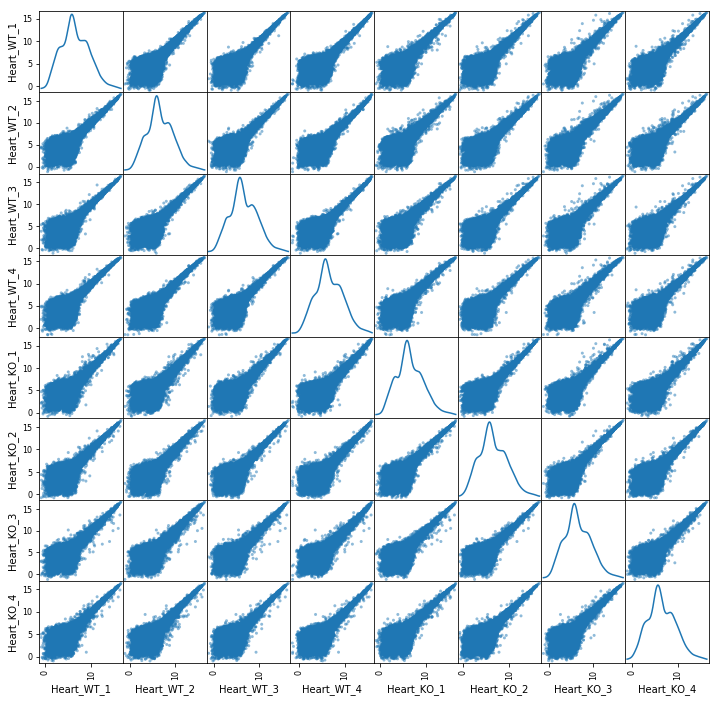

In [57]:
#%matplotlib notebook
#%matplotlib inline

from pandas.plotting import scatter_matrix

scatter_matrix(np.log2(df.iloc[:,0:8]), figsize=(12, 12), diagonal='kde')

The so-called M-A plot of expression change between KO and WT relative to average expression in these two conditions:

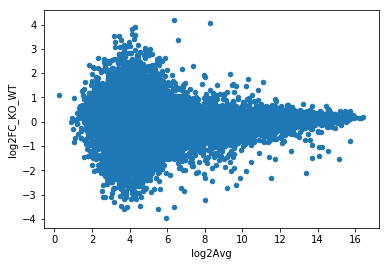

In [58]:
%matplotlib inline

pd.DataFrame(df[['log2FC_KO_WT', 'log2Avg']]).plot(x='log2Avg', y='log2FC_KO_WT', kind='scatter')

Histogram of the log fold changes

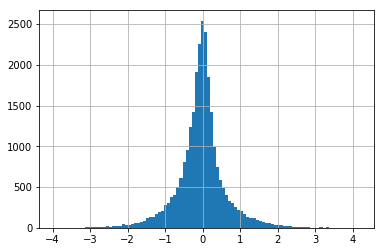

In [59]:
%matplotlib inline

df['log2FC_KO_WT'].hist(bins=100)

Or we can check how well the expression changes fit a gaussian distribution

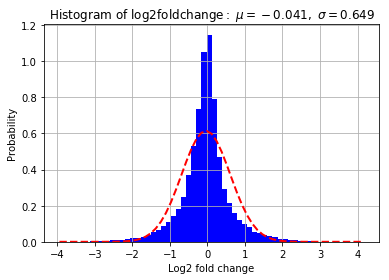

In [60]:
%matplotlib inline

from scipy.stats import norm
import matplotlib.mlab as mlab

# best fit of data
(mu, sigma) = norm.fit(df['log2FC_KO_WT'])

# the histogram of the data
n, bins, patches = plt.hist(df['log2FC_KO_WT'], 60, normed=1, facecolor='blue', alpha=1)

# add a 'best fit' line
y = mlab.normpdf(bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=2)

#plot
plt.xlabel('Log2 fold change')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ log2 fold change:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
plt.grid(True)

plt.show()

### Recap of the methods we have covered so far

In [61]:
column_names = ["gene", "Heart_WT_1", "Heart_WT_2", "Heart_WT_3", "Heart_WT_4", "Heart_KO_1", "Heart_KO_2", "Heart_KO_3", "Heart_KO_4"]
df = pd.read_csv("Datasets/GDS5087_expr_no_header.tsv", sep='\t', header=None)
df.columns = column_names
df.set_index('gene', inplace=True) 
df.head()
df['Heart_WT_avg'] = (df['Heart_WT_1']+df['Heart_WT_2']+df['Heart_WT_3']+df['Heart_WT_4'])/4
df['Heart_KO_avg'] = (df['Heart_KO_1']+df['Heart_KO_2']+df['Heart_KO_3']+df['Heart_KO_4'])/4
df['log2_Heart_KO_avg'] = np.log2(df['Heart_KO_avg'])
df['log2_Heart_WT_avg'] = np.log2(df['Heart_WT_avg'])
df['log2FC_KO_WT'] = np.log2(df['Heart_KO_avg'])-np.log2(df['Heart_WT_avg'])
df['log2Avg'] = np.log2((df['Heart_KO_avg']+df['Heart_WT_avg'])/2)
df.head()

,Heart_WT_1,Heart_WT_2,Heart_WT_3,Heart_WT_4,Heart_KO_1,Heart_KO_2,Heart_KO_3,Heart_KO_4,Heart_WT_avg,Heart_KO_avg,log2_Heart_KO_avg,log2_Heart_WT_avg,log2FC_KO_WT,log2Avg
gene,,,,,,,,,,,,,,
0610005C13Rik,15.6790,3.81280,5.35589,29.05140,6.2886,5.44082,17.1280,9.28925,13.474773,9.536668,3.253485,3.752189,-0.498704,3.524279
0610006L08Rik,10.1646,9.28523,9.82832,4.74096,54.3743,6.71068,18.5957,5.08162,8.504777,21.190575,4.405351,3.088273,1.317077,3.892165
0610007P14Rik,479.9380,499.81800,455.66500,412.38800,384.7330,406.34700,530.6380,394.66700,461.952250,429.096250,8.745157,8.851600,-0.106442,8.799360
0610009B22Rik,2740.4700,3117.59000,3087.69000,2775.45000,2879.5700,3246.40000,3153.2300,3336.21000,2930.300000,3153.852500,11.622899,11.516833,0.106067,11.570841
0610009L18Rik,749.2110,511.06900,626.89800,707.15900,553.6930,731.86300,738.4990,479.11900,648.584250,625.793500,9.289543,9.341150,-0.051607,9.315577


## Now let's go back and look deeper at dataframe functionality

### Merge and join

[Merge](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html) or [join](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) operations combine data sets, linking rows based on their keys. Here's how we construct a dataframe from a dictionary data structure, where dictionary keys are treated as column names, list of values associated with a key is treated as list of elements in the corresponding column, and rows are contructed based on the index of elements within the list of elements in the column (note however that all columns should have the same length):

In [62]:
df1 = pd.DataFrame({'key': ['b','b','a','c','a','a','b'], 'data1': range(7)})
#print(type(df1))
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [63]:
df2 = pd.DataFrame({'key': ['a','b','d'], 'data2': range(3)})
df2

,key,data2
0,a,0
1,b,1
2,d,2


Let's merge the two data frames, with the default application of the merge function:

In [64]:
pd.merge(df1, df2)

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


How has python interpreted our call to merge?

1. It has assumed that we want to merge on the basis of the common 'key' column.

2. It has identified the values of 'key' which occur in both dataframes

3. It has generated a dataframe with all combinations of rows from dataframes 1 and 2 that are associated with a particular key values

We can be more precise ourselves in specifying how to merge the dataframes, using the **on** option:

In [65]:
pd.merge(df1, df2, on='key')

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


By default, merge performs an 'inner' operation, taking the intersection of the key sets. However, we can specify the way we want to merge through options like 'outer', 'left', 'right'. This determines which set of keys to consider (the union of the two sets, all of those that occur in df1, all of those that occur in df2). Missing values show up as NaN.

In [66]:
pd.merge(df1, df2, on='key', how='outer')

,key,data1,data2
0,b,0.0,1.0
1,b,1.0,1.0
2,b,6.0,1.0
3,a,2.0,0.0
4,a,4.0,0.0
5,a,5.0,0.0
6,c,3.0,NaN
7,d,NaN,2.0


Merging can also be done based on index. For this lets use our example that we had before. 

In [67]:
column_names = ["gene", "Heart_WT_1", "Heart_WT_2", "Heart_WT_3", "Heart_WT_4", "Heart_KO_1", "Heart_KO_2", "Heart_KO_3", "Heart_KO_4"]
df = pd.read_csv("Datasets/GDS5087_expr_no_header.tsv", sep='\t', header=None)
df.columns = column_names
df.set_index('gene', inplace=True) 
df.head()
df['Heart_WT_avg'] = (df['Heart_WT_1']+df['Heart_WT_2']+df['Heart_WT_3']+df['Heart_WT_4'])/4
df['Heart_KO_avg'] = (df['Heart_KO_1']+df['Heart_KO_2']+df['Heart_KO_3']+df['Heart_KO_4'])/4
df['log2_Heart_KO_avg'] = np.log2(df['Heart_KO_avg'])
df['log2_Heart_WT_avg'] = np.log2(df['Heart_WT_avg'])
df['log2FC_KO_WT'] = np.log2(df['Heart_KO_avg'])-np.log2(df['Heart_WT_avg'])
df['log2Avg'] = np.log2((df['Heart_KO_avg']+df['Heart_WT_avg'])/2)
df.head()

,Heart_WT_1,Heart_WT_2,Heart_WT_3,Heart_WT_4,Heart_KO_1,Heart_KO_2,Heart_KO_3,Heart_KO_4,Heart_WT_avg,Heart_KO_avg,log2_Heart_KO_avg,log2_Heart_WT_avg,log2FC_KO_WT,log2Avg
gene,,,,,,,,,,,,,,
0610005C13Rik,15.6790,3.81280,5.35589,29.05140,6.2886,5.44082,17.1280,9.28925,13.474773,9.536668,3.253485,3.752189,-0.498704,3.524279
0610006L08Rik,10.1646,9.28523,9.82832,4.74096,54.3743,6.71068,18.5957,5.08162,8.504777,21.190575,4.405351,3.088273,1.317077,3.892165
0610007P14Rik,479.9380,499.81800,455.66500,412.38800,384.7330,406.34700,530.6380,394.66700,461.952250,429.096250,8.745157,8.851600,-0.106442,8.799360
0610009B22Rik,2740.4700,3117.59000,3087.69000,2775.45000,2879.5700,3246.40000,3153.2300,3336.21000,2930.300000,3153.852500,11.622899,11.516833,0.106067,11.570841
0610009L18Rik,749.2110,511.06900,626.89800,707.15900,553.6930,731.86300,738.4990,479.11900,648.584250,625.793500,9.289543,9.341150,-0.051607,9.315577


In [68]:
dir(df)

['Heart_KO_1',
 'Heart_KO_2',
 'Heart_KO_3',
 'Heart_KO_4',
 'Heart_KO_avg',
 'Heart_WT_1',
 'Heart_WT_2',
 'Heart_WT_3',
 'Heart_WT_4',
 'Heart_WT_avg',
 'T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_SLICEMAP',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__bytes__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__

Let's create two data frames, one containing the data for the WT and the other for the KO:

In [69]:
wt_cols = [col for col in df.columns if 'WT' in col and 'avg' not in col and 'log' not in col]
ko_cols = [col for col in df.columns if 'KO' in col and 'avg' not in col and 'log' not in col]
df_WT = df[wt_cols]
df_KO = df[ko_cols]
print(df_WT.head())
print(df_KO.head())

               Heart_WT_1  Heart_WT_2  Heart_WT_3  Heart_WT_4
gene                                                         
0610005C13Rik     15.6790     3.81280     5.35589    29.05140
0610006L08Rik     10.1646     9.28523     9.82832     4.74096
0610007P14Rik    479.9380   499.81800   455.66500   412.38800
0610009B22Rik   2740.4700  3117.59000  3087.69000  2775.45000
0610009L18Rik    749.2110   511.06900   626.89800   707.15900
               Heart_KO_1  Heart_KO_2  Heart_KO_3  Heart_KO_4
gene                                                         
0610005C13Rik      6.2886     5.44082     17.1280     9.28925
0610006L08Rik     54.3743     6.71068     18.5957     5.08162
0610007P14Rik    384.7330   406.34700    530.6380   394.66700
0610009B22Rik   2879.5700  3246.40000   3153.2300  3336.21000
0610009L18Rik    553.6930   731.86300    738.4990   479.11900


Let's merge these frames based on the index:

In [70]:
merged_df = pd.merge(df_WT, df_KO, left_index=True, right_index=True)
merged_df.head()

,Heart_WT_1,Heart_WT_2,Heart_WT_3,Heart_WT_4,Heart_KO_1,Heart_KO_2,Heart_KO_3,Heart_KO_4
gene,,,,,,,,
0610005C13Rik,15.6790,3.81280,5.35589,29.05140,6.2886,5.44082,17.1280,9.28925
0610006L08Rik,10.1646,9.28523,9.82832,4.74096,54.3743,6.71068,18.5957,5.08162
0610007P14Rik,479.9380,499.81800,455.66500,412.38800,384.7330,406.34700,530.6380,394.66700
0610009B22Rik,2740.4700,3117.59000,3087.69000,2775.45000,2879.5700,3246.40000,3153.2300,3336.21000
0610009L18Rik,749.2110,511.06900,626.89800,707.15900,553.6930,731.86300,738.4990,479.11900


Let's now take a look at the relationship between our samples performing principal component analysis.

We need another library that has various machine learning functions, but we will only use here the PCA function. 

First, however, we should transpose our dataframe and normalize the columns:

In [71]:
transposed_df = merged_df.transpose()
means = transposed_df.mean(axis=0)
stddevs = transposed_df.std(axis=0)
norm_df = (transposed_df - means)/stddevs
norm_df

gene,0610005C13Rik,0610006L08Rik,0610007P14Rik,0610009B22Rik,0610009L18Rik,0610009O20Rik,0610010F05Rik,0610010K14Rik,0610011F06Rik,0610012G03Rik,...,Zwint,Zxda,Zxdb,Zxdc,Zyg11a,Zyg11b,Zyx,Zzef1,Zzz3,l7Rn6
Heart_WT_1,0.482905,-0.282900,0.637570,-1.374869,1.018735,0.537864,0.857085,0.654900,-0.233272,1.793652,...,1.235561,-0.057243,-0.662942,-0.719849,-1.371558,1.106947,-0.862754,-0.649513,-0.395242,0.630841
Heart_WT_2,-0.890175,-0.336022,1.005878,0.344229,-1.146941,-1.902847,0.050942,-0.038613,-1.502313,-1.195649,...,-1.128472,1.220001,2.271897,-0.826601,0.589904,-1.722633,0.707834,0.617908,-0.084131,-1.358528
Heart_WT_3,-0.711619,-0.303215,0.187874,0.207930,-0.093586,-0.072600,0.377277,0.097472,-0.427696,-0.195815,...,-0.138783,-0.152793,-0.248960,1.754225,1.537366,1.182497,-0.484569,0.908039,-0.668721,-0.266446
Heart_WT_4,2.030273,-0.610537,-0.613902,-1.215413,0.636312,-0.597516,-0.350064,0.411092,-1.063606,-0.890055,...,-0.690116,0.479947,-0.250550,-1.245462,-1.030878,-0.922588,1.132370,1.359648,0.545426,-1.315471
Heart_KO_1,-0.603692,2.387766,-1.126255,-0.740783,-0.759316,0.822082,-1.745616,-1.844801,1.151272,1.139340,...,0.271710,-1.796960,0.100733,0.145734,0.825315,-0.181158,1.507127,-1.470800,-0.969668,1.063950
Heart_KO_2,-0.701791,-0.491548,-0.725821,0.931408,0.860971,0.905584,0.772288,-0.776858,0.111399,-0.422862,...,0.554935,0.327826,0.098801,-0.468828,-0.308650,-0.092336,-0.017750,0.599928,-1.173160,0.146118
Heart_KO_3,0.650574,0.226415,1.576868,0.506693,0.921319,0.923269,-1.065761,1.543420,1.214003,-0.213437,...,1.235438,0.968865,-1.100368,0.640585,-0.639918,0.713634,-1.014995,-0.867106,1.315317,1.323446
Heart_KO_4,-0.256476,-0.589958,-0.942212,1.340806,-1.437496,-0.615836,1.103848,-0.046612,0.750213,-0.015175,...,-1.340274,-0.989642,-0.208611,0.720196,0.398418,-0.084363,-0.967263,-0.498104,1.430179,-0.223910


In [72]:
wt_cols + ko_cols

['Heart_WT_1',
 'Heart_WT_2',
 'Heart_WT_3',
 'Heart_WT_4',
 'Heart_KO_1',
 'Heart_KO_2',
 'Heart_KO_3',
 'Heart_KO_4']

In [73]:
from sklearn.decomposition import PCA as sklearnPCA

pca = sklearnPCA(n_components=2) #2-dimensional PCA
print(type(pca))
transformed = pd.DataFrame(pca.fit_transform(transposed_df)).set_index([wt_cols + ko_cols])
print(type(transformed))

<class 'sklearn.decomposition.pca.PCA'>
<class 'pandas.core.frame.DataFrame'>


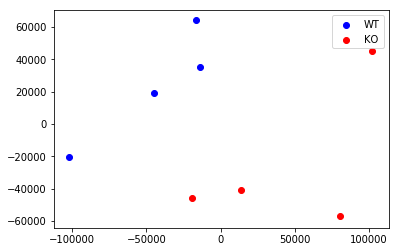

In [74]:
%matplotlib inline

from sklearn.decomposition import PCA as sklearnPCA

pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(transposed_df)).set_index([wt_cols + ko_cols])

#The return value transformed is a samples-by-n_components matrix with the new axes, 
#which we may now plot in the usual way.

plt.scatter(transformed.loc[wt_cols][0], transformed.loc[wt_cols][1], label='WT', c='blue')
plt.scatter(transformed.loc[ko_cols][0], transformed.loc[ko_cols][1], label='KO', c='red')

plt.legend()
plt.show()

More interesting would be to couple merging with filtering: let's say that we want to select the data only for the genes that in all of the WT samples are expressed above average.

In [75]:
df_WT.mean()

Heart_WT_1    825.062835
Heart_WT_2    818.984154
Heart_WT_3    790.990665
Heart_WT_4    758.003251
dtype: float64

In [76]:
subset_1 = pd.DataFrame(df_WT[df_WT['Heart_WT_1'] > df_WT.mean()['Heart_WT_1']]['Heart_WT_1'])
print(subset_1.size)
subset_2 = pd.DataFrame(df_WT[df_WT['Heart_WT_2'] > df_WT.mean()['Heart_WT_2']]['Heart_WT_2'])
print(subset_2.size)
subset_3 = pd.DataFrame(df_WT[df_WT['Heart_WT_3'] > df_WT.mean()['Heart_WT_3']]['Heart_WT_3'])
print(subset_3.size)
subset_4 = pd.DataFrame(df_WT[df_WT['Heart_WT_4'] > df_WT.mean()['Heart_WT_4']]['Heart_WT_4'])
print(subset_4.size)

3964
4012
4158
4286


We can use the join function to merge multiple dataframes based on the index. Please observe the the difference between the two different joins that follow.

In [77]:
subset_1.join(subset_2.join(subset_3.join(subset_4)))

,Heart_WT_1,Heart_WT_2,Heart_WT_3,Heart_WT_4
gene,,,,
0610009B22Rik,2740.470000,3117.590000,3087.690000,2775.450000
0610009O20Rik,1290.617700,NaN,NaN,NaN
0610012G03Rik,6729.960333,5134.008000,5667.807667,5297.161333
1110001J03Rik,8315.690000,5485.720000,7481.440000,6283.410000
1110002E22Rik,5226.740000,4568.050000,5168.300000,5255.935000
1110004F10Rik,1845.000000,1663.510000,1516.210000,1537.120000
1110007C09Rik,2170.110000,1417.740000,1993.520000,1686.850000
1110008F13Rik,3824.148450,3109.189600,3032.088500,2918.820750
1110008P14Rik,1390.721667,1034.888667,1204.220667,1205.209000


Note that this will be different if we perform the 'join' in the reverse order:

In [78]:
subset_4.join(subset_3.join(subset_2.join(subset_1)))

,Heart_WT_4,Heart_WT_3,Heart_WT_2,Heart_WT_1
gene,,,,
0610009B22Rik,2775.450000,3087.690000,3117.590000,2740.470000
0610009O20Rik,1057.542850,1165.299500,NaN,NaN
0610012G03Rik,5297.161333,5667.807667,5134.008000,6729.960333
1110001J03Rik,6283.410000,7481.440000,5485.720000,8315.690000
1110002E22Rik,5255.935000,5168.300000,4568.050000,5226.740000
1110004F10Rik,1537.120000,1516.210000,1663.510000,1845.000000
1110007C09Rik,1686.850000,1993.520000,1417.740000,2170.110000
1110008F13Rik,2918.820750,3032.088500,3109.189600,3824.148450
1110008P14Rik,1205.209000,1204.220667,1034.888667,1390.721667


To make sure we get the same answert we can use the how='outer' option that takes the union of all keys:

In [79]:
print(subset_1.join(subset_2.join(subset_3.join(subset_4, how='outer'), how='outer'), how='outer').shape)
print(subset_4.join(subset_3.join(subset_2.join(subset_1, how='outer'), how='outer'), how='outer').shape)

(4553, 4)
(4553, 4)


### Concatenate

Another useful function is  [concat](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.concat.html), which can be also used to combine dataframes in different ways.

Lets take the first 10 rows and the last 10 columns from the main dataframe and concatenate their rows

In [80]:
first_10_rows = df.head(10)
last_10_rows = df.tail(10)

In [81]:
pd.concat([first_10_rows, last_10_rows], axis=0)

,Heart_WT_1,Heart_WT_2,Heart_WT_3,Heart_WT_4,Heart_KO_1,Heart_KO_2,Heart_KO_3,Heart_KO_4,Heart_WT_avg,Heart_KO_avg,log2_Heart_KO_avg,log2_Heart_WT_avg,log2FC_KO_WT,log2Avg
gene,,,,,,,,,,,,,,
0610005C13Rik,15.679000,3.812800,5.355890,29.051400,6.288600,5.440820,17.128000,9.289250,13.474773,9.536668,3.253485,3.752189,-0.498704,3.524279
0610006L08Rik,10.164600,9.285230,9.828320,4.740960,54.374300,6.710680,18.595700,5.081620,8.504777,21.190575,4.405351,3.088273,1.317077,3.892165
0610007P14Rik,479.938000,499.818000,455.665000,412.388000,384.733000,406.347000,530.638000,394.667000,461.952250,429.096250,8.745157,8.851600,-0.106442,8.799360
0610009B22Rik,2740.470000,3117.590000,3087.690000,2775.450000,2879.570000,3246.400000,3153.230000,3336.210000,2930.300000,3153.852500,11.622899,11.516833,0.106067,11.570841
0610009L18Rik,749.211000,511.069000,626.898000,707.159000,553.693000,731.863000,738.499000,479.119000,648.584250,625.793500,9.289543,9.341150,-0.051607,9.315577
0610009O20Rik,1290.617700,789.580000,1165.299500,1057.542850,1348.963000,1366.104500,1369.735000,1053.782000,1075.760013,1284.646125,10.327155,10.071141,0.256015,10.204819
0610010F05Rik,321.429000,299.859500,308.591050,289.130000,251.790000,319.160150,269.980500,328.031500,304.752388,292.240538,8.191013,8.251494,-0.060481,8.221570
0610010K14Rik,495.309000,477.666000,481.128000,489.106500,431.716500,458.885000,517.913000,477.462500,485.802375,471.494250,8.881096,8.924226,-0.043129,8.902822
0610011F06Rik,570.656000,444.603000,551.344000,488.179500,708.182000,604.892000,714.413000,668.345000,513.695625,673.958000,9.396515,9.004770,0.391745,9.213898


We can also concatenate by columns. We could do this with our WT and KO dataframes:

In [82]:
pd.concat([df_WT, df_KO], axis=1)

,Heart_WT_1,Heart_WT_2,Heart_WT_3,Heart_WT_4,Heart_KO_1,Heart_KO_2,Heart_KO_3,Heart_KO_4
gene,,,,,,,,
0610005C13Rik,15.679000,3.812800,5.355890,29.051400,6.288600,5.440820,17.128000,9.289250
0610006L08Rik,10.164600,9.285230,9.828320,4.740960,54.374300,6.710680,18.595700,5.081620
0610007P14Rik,479.938000,499.818000,455.665000,412.388000,384.733000,406.347000,530.638000,394.667000
0610009B22Rik,2740.470000,3117.590000,3087.690000,2775.450000,2879.570000,3246.400000,3153.230000,3336.210000
0610009L18Rik,749.211000,511.069000,626.898000,707.159000,553.693000,731.863000,738.499000,479.119000
0610009O20Rik,1290.617700,789.580000,1165.299500,1057.542850,1348.963000,1366.104500,1369.735000,1053.782000
0610010F05Rik,321.429000,299.859500,308.591050,289.130000,251.790000,319.160150,269.980500,328.031500
0610010K14Rik,495.309000,477.666000,481.128000,489.106500,431.716500,458.885000,517.913000,477.462500
0610011F06Rik,570.656000,444.603000,551.344000,488.179500,708.182000,604.892000,714.413000,668.345000


If there are missing values, we will see NaN entries, as here:

In [83]:
pd.concat([df_WT.head(n=5), df_KO.head(n=10)], axis=1)

/Users/fucileg_l/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,Heart_WT_1,Heart_WT_2,Heart_WT_3,Heart_WT_4,Heart_KO_1,Heart_KO_2,Heart_KO_3,Heart_KO_4
0610005C13Rik,15.6790,3.81280,5.35589,29.05140,6.2886,5.44082,17.128000,9.289250
0610006L08Rik,10.1646,9.28523,9.82832,4.74096,54.3743,6.71068,18.595700,5.081620
0610007P14Rik,479.9380,499.81800,455.66500,412.38800,384.7330,406.34700,530.638000,394.667000
0610009B22Rik,2740.4700,3117.59000,3087.69000,2775.45000,2879.5700,3246.40000,3153.230000,3336.210000
0610009L18Rik,749.2110,511.06900,626.89800,707.15900,553.6930,731.86300,738.499000,479.119000
0610009O20Rik,NaN,NaN,NaN,NaN,1348.9630,1366.10450,1369.735000,1053.782000
0610010F05Rik,NaN,NaN,NaN,NaN,251.7900,319.16015,269.980500,328.031500
0610010K14Rik,NaN,NaN,NaN,NaN,431.7165,458.88500,517.913000,477.462500
0610011F06Rik,NaN,NaN,NaN,NaN,708.1820,604.89200,714.413000,668.345000
0610012G03Rik,NaN,NaN,NaN,NaN,6380.6310,5546.59000,5658.399333,5764.249333


### Applying functions to dataframe rows or columns

We can write our on functions and apply them row-wise or column-wise to our dataframe. 

For example, let's implement our version of the default [mean](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html) function.

To see better what's going one, we'll extract a short section of our dataframe:

In [84]:
short_df = df.iloc[0:10,0:8]
short_df

,Heart_WT_1,Heart_WT_2,Heart_WT_3,Heart_WT_4,Heart_KO_1,Heart_KO_2,Heart_KO_3,Heart_KO_4
gene,,,,,,,,
0610005C13Rik,15.679000,3.81280,5.355890,29.051400,6.2886,5.44082,17.128000,9.289250
0610006L08Rik,10.164600,9.28523,9.828320,4.740960,54.3743,6.71068,18.595700,5.081620
0610007P14Rik,479.938000,499.81800,455.665000,412.388000,384.7330,406.34700,530.638000,394.667000
0610009B22Rik,2740.470000,3117.59000,3087.690000,2775.450000,2879.5700,3246.40000,3153.230000,3336.210000
0610009L18Rik,749.211000,511.06900,626.898000,707.159000,553.6930,731.86300,738.499000,479.119000
0610009O20Rik,1290.617700,789.58000,1165.299500,1057.542850,1348.9630,1366.10450,1369.735000,1053.782000
0610010F05Rik,321.429000,299.85950,308.591050,289.130000,251.7900,319.16015,269.980500,328.031500
0610010K14Rik,495.309000,477.66600,481.128000,489.106500,431.7165,458.88500,517.913000,477.462500
0610011F06Rik,570.656000,444.60300,551.344000,488.179500,708.1820,604.89200,714.413000,668.345000


In [85]:
# we assume that we get an array/list/Series as input
def calculate_mean(inp):
    
    '''Calculate mean'''
    
    total = 0
    for i in inp:
        total = total + i
    return total/len(inp)
    
    # or just
    # return np.average(inp)

Now we apply the function across columns (axis = 1):

In [86]:
short_df.apply(calculate_mean, axis=1)

gene
0610005C13Rik      11.505720
0610006L08Rik      14.847676
0610007P14Rik     445.524250
0610009B22Rik    3042.076250
0610009L18Rik     637.188875
0610009O20Rik    1180.203069
0610010F05Rik     298.496463
0610010K14Rik     478.648312
0610011F06Rik     593.826812
0610012G03Rik    5772.350875
dtype: float64

which gives the same output as the default function:

In [87]:
short_df.mean(axis=1)

gene
0610005C13Rik      11.505720
0610006L08Rik      14.847676
0610007P14Rik     445.524250
0610009B22Rik    3042.076250
0610009L18Rik     637.188875
0610009O20Rik    1180.203069
0610010F05Rik     298.496463
0610010K14Rik     478.648312
0610011F06Rik     593.826812
0610012G03Rik    5772.350875
dtype: float64

### Finally, we can reogranize our dataframes using the groupby() function

Let's say we want to group the genes by the direction of their change in the KO. But we'll take again a smaller part of the data frame for this:

In [88]:
short_df = df.iloc[0:10][['log2_Heart_WT_avg', 'log2_Heart_KO_avg', 'log2FC_KO_WT']]
short_df

,log2_Heart_WT_avg,log2_Heart_KO_avg,log2FC_KO_WT
gene,,,
0610005C13Rik,3.752189,3.253485,-0.498704
0610006L08Rik,3.088273,4.405351,1.317077
0610007P14Rik,8.851600,8.745157,-0.106442
0610009B22Rik,11.516833,11.622899,0.106067
0610009L18Rik,9.341150,9.289543,-0.051607
0610009O20Rik,10.071141,10.327155,0.256015
0610010F05Rik,8.251494,8.191013,-0.060481
0610010K14Rik,8.924226,8.881096,-0.043129
0610011F06Rik,9.004770,9.396515,0.391745


Now let's make an additional column that tells us the direction of the change: 'Upregulated' if the log2FC > 0, 'Downregulated' if the log2FC < 0 and 'Unchanged' if the log2FC == 0. Let's first define our own function for this:

In [89]:
def directionality(x):
    if(x > 0):
        return 'Upregulated'
    elif(x < 0):
        return 'Downregulated'
    else:
        return 'Unchanged'

In [90]:
short_df['Type'] = short_df['log2FC_KO_WT'].map(directionality)
short_df

,log2_Heart_WT_avg,log2_Heart_KO_avg,log2FC_KO_WT,Type
gene,,,,
0610005C13Rik,3.752189,3.253485,-0.498704,Downregulated
0610006L08Rik,3.088273,4.405351,1.317077,Upregulated
0610007P14Rik,8.851600,8.745157,-0.106442,Downregulated
0610009B22Rik,11.516833,11.622899,0.106067,Upregulated
0610009L18Rik,9.341150,9.289543,-0.051607,Downregulated
0610009O20Rik,10.071141,10.327155,0.256015,Upregulated
0610010F05Rik,8.251494,8.191013,-0.060481,Downregulated
0610010K14Rik,8.924226,8.881096,-0.043129,Downregulated
0610011F06Rik,9.004770,9.396515,0.391745,Upregulated


Then we can group by the type of change and count how many genes were of these three types:

In [91]:
short_df.groupby('Type').count()

,log2_Heart_WT_avg,log2_Heart_KO_avg,log2FC_KO_WT
Type,,,
Downregulated,5,5,5
Upregulated,5,5,5


We can do this on the large dataset as well (we print out the result on only one column):

In [92]:
df['Type']=df['log2FC_KO_WT'].map(directionality)
df.groupby('Type')['Type'].count()

Type
Downregulated    14166
Upregulated      12406
Name: Type, dtype: int64

### Write files to disk

At the end of the analysis we want to save our results so we should write some files out. 

We can use the function [to_csv](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_csv.html):

In [93]:
short_df.head().to_csv("short_example.csv")

Or we can export it as tsv

In [94]:
short_df.head().to_csv("short_example.tsv", sep='\t')

Or we can export it without the header

In [95]:
short_df.head().to_csv("short_example_no_header.tsv", sep='\t', header=None)

### Exercises with pandas

- Create a pandas dataframe where the index consists of the integers 0-100. Remove a few rows from the dataframe. Slice the first rows using .ix .iloc and .loc and make sure that you get the expected behavior.
- Split the original tsv files in three parts. Read in the three files and use merge/concatenate them in a big dataframe. Subtract the mean from rows and columns.
- Check the relationship between samples by PCA

# Seaborn

Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics. You can find a big catalog of plots [here](https://seaborn.pydata.org/examples/index.html).

In [96]:
import seaborn as sns

Let us do some visualization using the same example dataframe.

In [97]:
column_names = ["gene", "Heart_WT_1", "Heart_WT_2", "Heart_WT_3", "Heart_WT_4", "Heart_KO_1", "Heart_KO_2", "Heart_KO_3", "Heart_KO_4"]
df = pd.read_csv("Datasets/GDS5087_expr_no_header.tsv", sep='\t', header=None)
df.columns = column_names
df.set_index('gene', inplace=True)
df['Heart_WT_avg'] = (df['Heart_WT_1']+df['Heart_WT_2']+df['Heart_WT_3']+df['Heart_WT_4'])/4
df['Heart_KO_avg'] = (df['Heart_KO_1']+df['Heart_KO_2']+df['Heart_KO_3']+df['Heart_KO_4'])/4
df['log2_Heart_KO_avg'] = np.log2(df['Heart_KO_avg'])
df['log2_Heart_WT_avg'] = np.log2(df['Heart_WT_avg'])
df['log2FC_KO_WT'] = np.log2(df['Heart_KO_avg'])-np.log2(df['Heart_WT_avg'])
df['log2Avg'] = np.log2((df['Heart_KO_avg']+df['Heart_WT_avg'])/2)
df.head()

,Heart_WT_1,Heart_WT_2,Heart_WT_3,Heart_WT_4,Heart_KO_1,Heart_KO_2,Heart_KO_3,Heart_KO_4,Heart_WT_avg,Heart_KO_avg,log2_Heart_KO_avg,log2_Heart_WT_avg,log2FC_KO_WT,log2Avg
gene,,,,,,,,,,,,,,
0610005C13Rik,15.6790,3.81280,5.35589,29.05140,6.2886,5.44082,17.1280,9.28925,13.474773,9.536668,3.253485,3.752189,-0.498704,3.524279
0610006L08Rik,10.1646,9.28523,9.82832,4.74096,54.3743,6.71068,18.5957,5.08162,8.504777,21.190575,4.405351,3.088273,1.317077,3.892165
0610007P14Rik,479.9380,499.81800,455.66500,412.38800,384.7330,406.34700,530.6380,394.66700,461.952250,429.096250,8.745157,8.851600,-0.106442,8.799360
0610009B22Rik,2740.4700,3117.59000,3087.69000,2775.45000,2879.5700,3246.40000,3153.2300,3336.21000,2930.300000,3153.852500,11.622899,11.516833,0.106067,11.570841
0610009L18Rik,749.2110,511.06900,626.89800,707.15900,553.6930,731.86300,738.4990,479.11900,648.584250,625.793500,9.289543,9.341150,-0.051607,9.315577


We can make boxplots of gene expression in different samples with the [boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html) function:

/Users/fucileg_l/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


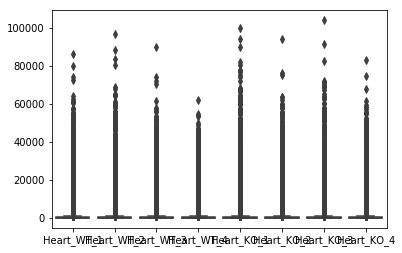

In [98]:
%matplotlib inline

sns.boxplot(data=df.iloc[:,0:8])

Given how wide the range of variation is, we may rather want to look at log expression values. We can do that by just applying the numpy log2 function to the dataframe:

/Users/fucileg_l/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


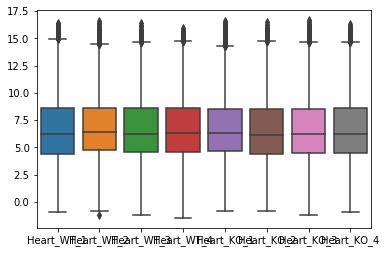

In [99]:
%matplotlib inline

sns.boxplot(data=np.log2(df.iloc[:,0:8]))

Seaborn functions use the dataframe data in two different ways. Some functions such as [kdeplot](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) (which plots a bivariate kernel density estimate of the data) need as arguments the columns of the dataframe. Others, such as the [regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html) need as arguments the dataframe and the specific names of the columns to be used in the plotting. Observe the differences in the two plots below.

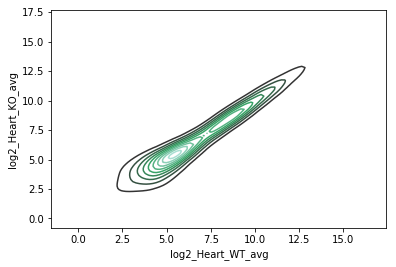

In [100]:
%matplotlib inline

# be patient..
sns.kdeplot(df['log2_Heart_WT_avg'], df['log2_Heart_KO_avg'])

Save the figure to file:

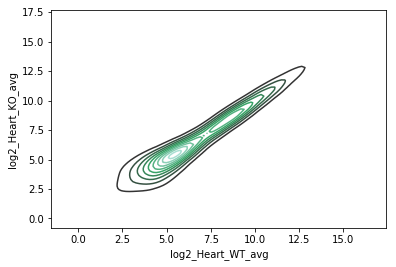

In [101]:
%matplotlib inline

# be patient..
myfig = sns.kdeplot(df['log2_Heart_WT_avg'], df['log2_Heart_KO_avg'])
#myfig.figure.savefig("foo.pdf")
myfig.figure.savefig("foo.png")

Alternatively, save the figure to file:

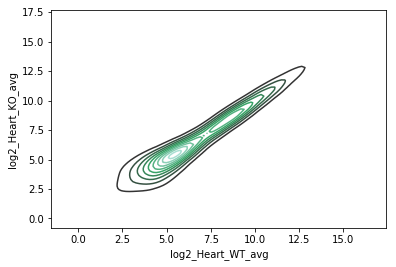

In [102]:
%matplotlib inline

# be patient..
myfig = sns.kdeplot(df['log2_Heart_WT_avg'], df['log2_Heart_KO_avg'])
myfig = myfig.get_figure()
myfig.savefig("foo2.pdf")

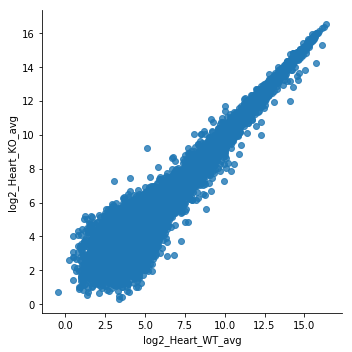

In [103]:
%matplotlib inline

sns.lmplot("log2_Heart_WT_avg", "log2_Heart_KO_avg", data=df, fit_reg=False)

An advantage of the seaborn package is makes it easy to mark points and create more complicated plots. 

For example, let's mark the genes with large changes (abs(log2FC)):

In [104]:
df['Change'] = df['log2FC_KO_WT'].apply(lambda x: 'Large' if abs(x) > 3 else 'Small')
df.head()

,Heart_WT_1,Heart_WT_2,Heart_WT_3,Heart_WT_4,Heart_KO_1,Heart_KO_2,Heart_KO_3,Heart_KO_4,Heart_WT_avg,Heart_KO_avg,log2_Heart_KO_avg,log2_Heart_WT_avg,log2FC_KO_WT,log2Avg,Change
gene,,,,,,,,,,,,,,,
0610005C13Rik,15.6790,3.81280,5.35589,29.05140,6.2886,5.44082,17.1280,9.28925,13.474773,9.536668,3.253485,3.752189,-0.498704,3.524279,Small
0610006L08Rik,10.1646,9.28523,9.82832,4.74096,54.3743,6.71068,18.5957,5.08162,8.504777,21.190575,4.405351,3.088273,1.317077,3.892165,Small
0610007P14Rik,479.9380,499.81800,455.66500,412.38800,384.7330,406.34700,530.6380,394.66700,461.952250,429.096250,8.745157,8.851600,-0.106442,8.799360,Small
0610009B22Rik,2740.4700,3117.59000,3087.69000,2775.45000,2879.5700,3246.40000,3153.2300,3336.21000,2930.300000,3153.852500,11.622899,11.516833,0.106067,11.570841,Small
0610009L18Rik,749.2110,511.06900,626.89800,707.15900,553.6930,731.86300,738.4990,479.11900,648.584250,625.793500,9.289543,9.341150,-0.051607,9.315577,Small


In [105]:
len(df[df["Change"] == "Large"])

#dir(df[df["Change"] == "Large"])


41

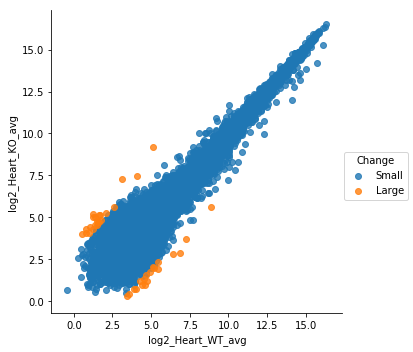

In [106]:
%matplotlib inline

sns.lmplot("log2_Heart_WT_avg", "log2_Heart_KO_avg", data=df, hue='Change', fit_reg=False)